Decision tree using pipeline

In [1]:
# import basic libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Using Abalone data set for classification

In [4]:
col_names = ['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell Weight', 'Rings']
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header = None, names = col_names)
abalone_data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_data.shape

(4177, 9)

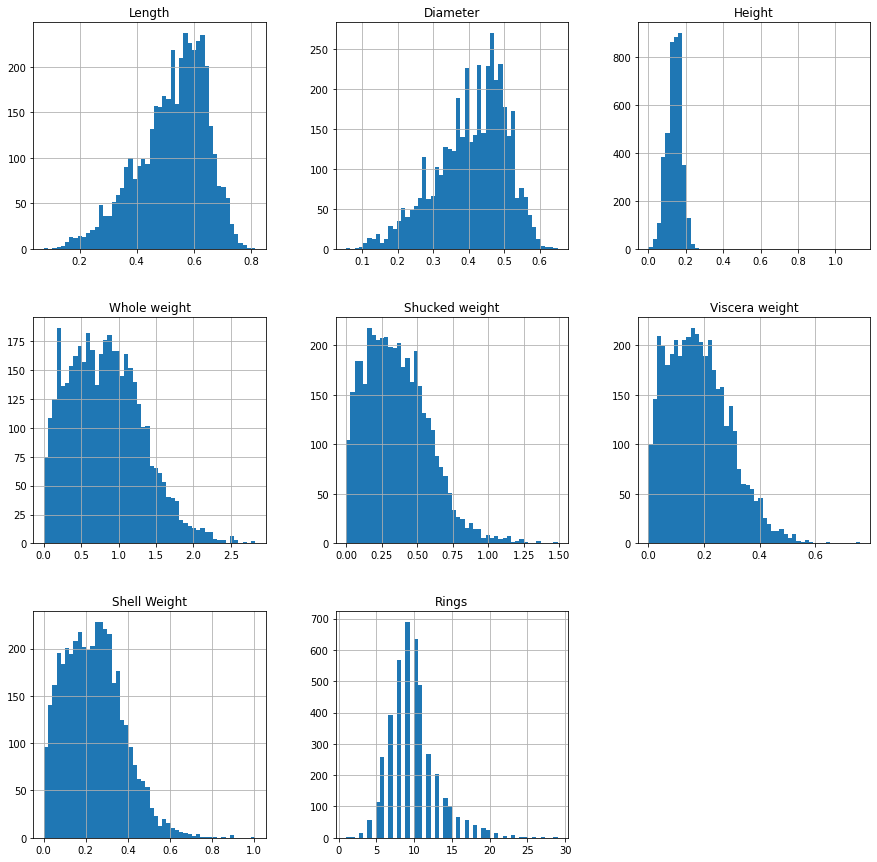

In [6]:
# EDA
abalone_data.hist(bins = 50, figsize =(15,15))

# display histogram
plt.show()

<Figure size 432x288 with 0 Axes>

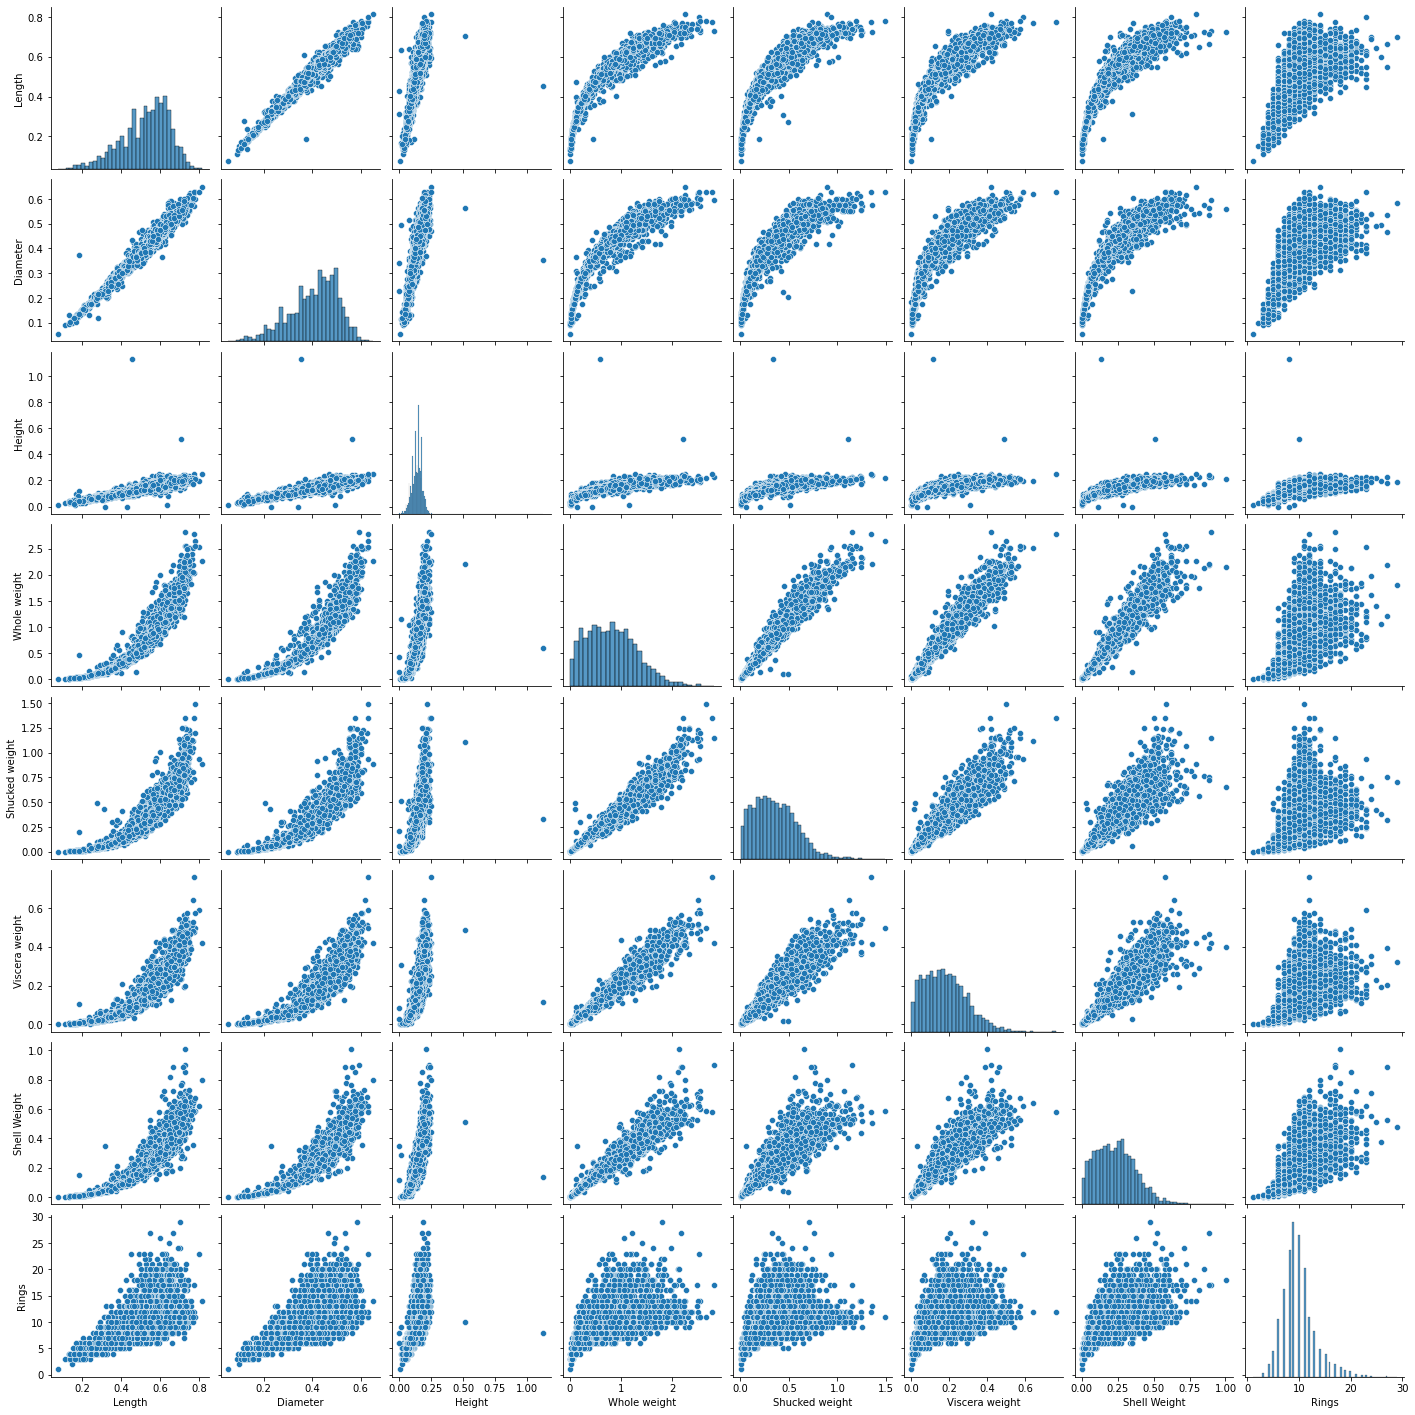

In [8]:
plt.figure()
sns.pairplot(abalone_data, diag_kind = 'hist')
plt.show()

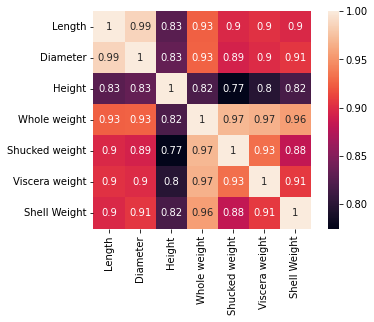

In [10]:
plt.figure()
sns.heatmap(abalone_data.iloc[:, :-1].corr(), annot = True, square = True)
plt.show()

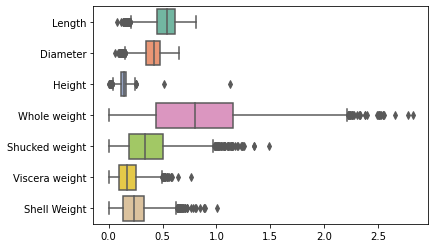

In [14]:
plt.figure()
sns.boxplot(data = abalone_data.iloc[:,:-1], orient ='h', palette = "Set2" )
plt.show()

In [15]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [16]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

lets take a look at target in this case Rings column

In [18]:
abalone_data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

Missing values or zero values

In [19]:
(abalone_data['Height'] == 0).sum()

2

In [21]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [23]:
means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc = {'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


So we fill the missing values with 0.107995

In [24]:
X = abalone_data.iloc[:,:-1]
y = abalone_data.iloc[:,-1]

In [25]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


Splitting data into train and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    random_state = 0)

Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

Identifying the numeric and categorical features- to be able to preprocess them differently

In [39]:
num_features = []
for feature in col_names:
  if abalone_data[feature].dtype != 'O' and feature != 'Rings' :
    num_features.append(feature) 
num_features

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell Weight']

In [40]:
cat_features = ['Sex']

In [41]:
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values = 0, strategy = "constant", fill_value = 0.107996)),
    ('scaler', StandardScaler())
])


In [42]:
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

In [43]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

In [44]:
# append the classifier to preprocessing pipeline
# now we have a full prediction pipeline

clf = Pipeline(
    steps = [("preprocessor", preprocessor),
             ("classifier", DecisionTreeClassifier(
                 max_depth = 3, random_state = 42
             ))]
)

In [45]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.107996,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell Weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [46]:
# model score

clf.score(X_test, y_test)

0.2452153110047847

In [47]:
y_pred = clf.predict(X_test)

In [48]:
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test),1)),1)

In [49]:
for each in comparison:
  print(each)

[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]
[7 8]
[5 8]
[ 9 11]
[8 9]
[5 4]
[10  7]
[9 7]
[10 17]
[10  7]
[7 7]
[7 7]
[7 5]
[8 8]
[9 9]
[10 10]
[10 10]
[4 5]
[11 15]
[ 8 10]
[10 14]
[9 8]
[4 4]
[10  9]
[11 13]
[7 7]
[8 7]
[7 8]
[10  9]
[7 8]
[10 11]
[ 8 15]
[ 8 12]
[ 8 17]
[10 16]
[10 11]
[ 8 11]
[9 8]
[10 10]
[10 11]
[7 6]
[10 13]
[7 7]
[ 9 13]
[11 20]
[ 8 12]
[9 7]
[5 8]
[ 9 10]
[7 7]
[7 7]
[10  9]
[9 9]
[ 9 11]
[7 8]
[7 7]
[11 12]
[11 13]
[10 17]
[8 8]
[11 12]
[8 9]
[11 17]
[10 10]
[8 6]
[ 8 11]
[8 8]
[10  8]
[8 9]
[10  8]
[8 8]
[10  8]
[5 6]
[7 7]
[10 13]
[ 8 11]
[7 6]
[10  9]
[11 12]
[4 5]
[7 6]
[ 9 11]
[ 8 11]
[9 8]
[7 7]
[10 16]
[5 8]
[ 8 11]
[9 8]
[10 18]
[10 11]
[10 12]
[ 8 14]
[10 12]
[10 11]
[5 6]
[10  9]
[7 7]
[7 6]
[ 7 11]
[10 11]
[11 11]
[11 12]
[ 8 20]
[ 9 10]
[10 14]
[11 10]
[10 10]
[10 12]
[5 4]
[ 8 12]
[7 7]
[10 13]
[7 6]
[8 8]
[10 17]
[10 15]
[10  9]
[10 11]
[7 7]
[10 11]
[10  8]
[9 7]
[8 7]
[10 10]
[11 11]
[10  9]
[ 8 10]
[8 9]
[7 8]
[11 16

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 14  0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0 28  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0 56 13 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 25 43 28 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 47 24 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 22 17 49 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 20 14 45 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 17  3 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  2 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

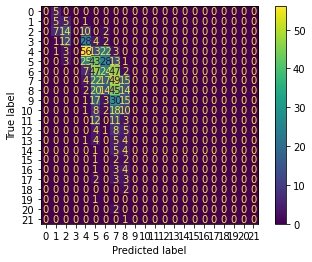

In [62]:
# visualize:

import sklearn

disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [63]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print('classification report \n')
print(cr)

classification report 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = clf, X = X_train, y = y_train, cv =10)
print(type(acc))
print(f'accuracy of each fold {list(acc*100)}')
print(f'accuracy : {acc.mean()*100}')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


<class 'numpy.ndarray'>
accuracy of each fold [27.46268656716418, 22.45508982035928, 23.952095808383234, 24.550898203592812, 24.251497005988025, 23.952095808383234, 25.449101796407188, 30.83832335329341, 26.34730538922156, 26.047904191616766]
accuracy : 25.530699794440963


visualise the decision tree

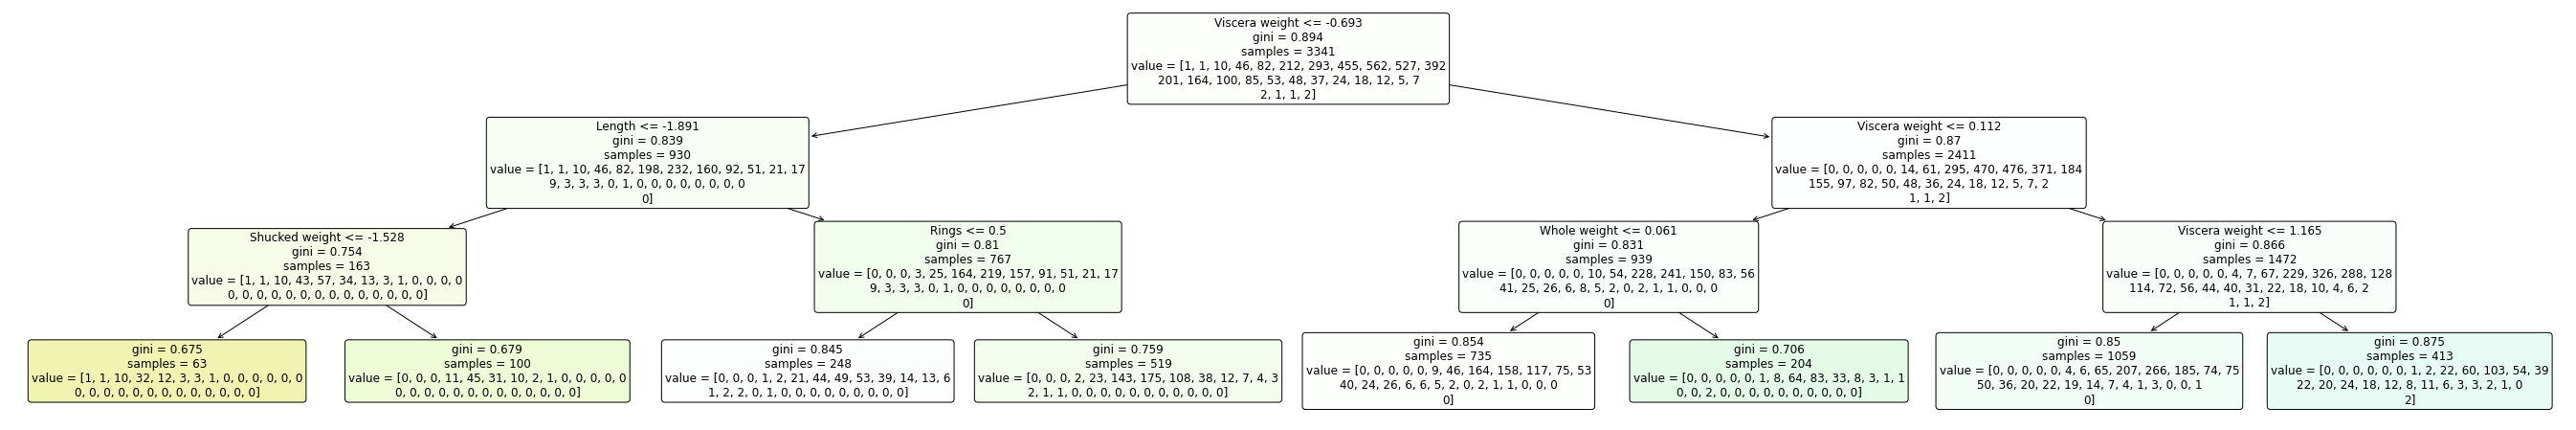

In [67]:
from sklearn import tree
plt.figure(figsize = (48,8), facecolor = 'w')

# create tree plot:

a = tree.plot_tree(clf['classifier'],
                   feature_names = col_names,
                   rounded = True,
                   filled = True,
                   fontsize = 12)
# show the plot
plt.show()

In [69]:
# finding the best paramerter using GridSearchCV

X_train_new = preprocessor.fit_transform(X_train)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = [{'max_depth': [1,2,3,4,5,6,7,8,9],
           'min_samples_split' : [2,4,6,8,10]}]

scores = ['recall']

for score in scores:
  print()
  print(f"Tuning Hyperparameter for {score}")
  print()

  clf_CV = GridSearchCV(DecisionTreeClassifier(),
                        params, 
                        scoring = f'{score}_macro')
  
  clf_CV.fit(X_train_new, y_train)

  print('Best parametes: ')
  print()
  print(clf_CV.best_params_)
  print()
  print('GridScores: ')
  means = clf_CV.cv_results_['mean_test_score']
  stds = clf_CV.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf_CV.cv_results_['params']):
    print(f"{mean:.3f} (+/- {std*2:0.03f}) for {params}")


Tuning Hyperparameter for recall



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behav

Best parametes: 

{'max_depth': 5, 'min_samples_split': 2}

GridScores: 
0.073 (+/- 0.009) for {'max_depth': 1, 'min_samples_split': 2}
0.073 (+/- 0.009) for {'max_depth': 1, 'min_samples_split': 4}
0.073 (+/- 0.009) for {'max_depth': 1, 'min_samples_split': 6}
0.073 (+/- 0.009) for {'max_depth': 1, 'min_samples_split': 8}
0.073 (+/- 0.009) for {'max_depth': 1, 'min_samples_split': 10}
0.107 (+/- 0.011) for {'max_depth': 2, 'min_samples_split': 2}
0.107 (+/- 0.011) for {'max_depth': 2, 'min_samples_split': 4}
0.107 (+/- 0.011) for {'max_depth': 2, 'min_samples_split': 6}
0.107 (+/- 0.011) for {'max_depth': 2, 'min_samples_split': 8}
0.107 (+/- 0.011) for {'max_depth': 2, 'min_samples_split': 10}
0.131 (+/- 0.012) for {'max_depth': 3, 'min_samples_split': 2}
0.131 (+/- 0.012) for {'max_depth': 3, 'min_samples_split': 4}
0.131 (+/- 0.012) for {'max_depth': 3, 'min_samples_split': 6}
0.131 (+/- 0.012) for {'max_depth': 3, 'min_samples_split': 8}
0.131 (+/- 0.012) for {'max_depth': 3, 'min

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets create a new pipeline with best features identified:

In [76]:
clf2 = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('classifier', DecisionTreeClassifier(
                 max_depth = 5, min_samples_split = 4, random_state = 42
             ))]
)

In [77]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.107996,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell Weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=4,
                                        random_state=42))])

In [78]:
clf2.score(X_test, y_test)

0.2715311004784689